In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from pathlib import Path
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#from datetime import datetime
##from scipy.cluster.hierarchy import linkage, fcluster, leaves_list
#from scipy.spatial.distance import pdist
# from sklearn.cluster import KMeans
import seaborn as sns
# import src.stimuli_timeline as st
import src.plotting as plott
import src.data_loading as exio
import src.analysis_tools as at
# from src.significant_traces import compute_noise_model_romano_fast_modular, plot_dff_and_raster
plt.style.use('default')
# %matplotlib qt
%matplotlib inline

In [2]:
# ==== CONFIG ================================================================
fish_id = "L433_f02"
experiment_name = "Exp_1_flickering"
main_path = Path(r"C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p")
stimuli_main_path = Path(r"\\nasdcsr.unil.ch\RECHERCHE\FAC\FBM\CIG\jlarsch\default\D2c\Alejandro\2p")
fps_2p = 2.0
selected_blocks = [f"B{n}" for n in range(1, 3)]

# ==== LOAD EVERYTHING IN ONE GO ============================================
results = exio.load_2p_experiment(
    fish_id=fish_id,
    experiment_name=experiment_name,
    main_path=main_path,
    stimuli_main_path=stimuli_main_path,
    fps_2p=fps_2p,
    selected_blocks=selected_blocks,
)

dfof              = results["dfof"]
stimuli_durations = results["stimuli_durations"]
exp_log           = results["adjusted_log"]
stimuli_trace_60  = results["stimuli_trace_60"]
stimuli_table     = results["stimuli_table"]
stimuli_id_map    = results["stimuli_id_map"]
duration_2p_block_sec = results["duration_2p_block_sec"]
frames_per_block       = results["frames_per_block"]
paths                  = results["paths"]
raster                 = results["raster"]
dfof_center =           results["deltaF_center"]

print("dFoF shape:", dfof.shape)
print("Frames per block:", frames_per_block)
print("Paths:", paths["dfof_file"])

✅ Loaded significant traces from C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p\L433_f02_Exp_1_flickering\03_analysis\functional\plots\significant_traces\L433_f02_significant_traces.npz
✅ Loaded kept_neuron_indices from C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p\L433_f02_Exp_1_flickering\03_analysis\functional\plots\filtered_neurons_by_stimuli\L433_f02_kept_neuron_indices.npy
✅ Loaded filtered_roi_indices from C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p\L433_f02_Exp_1_flickering\03_analysis\functional\suite2P\merged_dFoF\L433_f02_dFoF_merged_filtered_roi_indices.npy
✅ Using preferred dFoF file: C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p\L433_f02_Exp_1_flickering\03_analysis\functional\suite2P\merged_dFoF\L433_f02_dFoF_merged.npy
✅ Using block log: C:\Users\suribear\OneDrive - Université de Lausanne\Lab\Data\2p\L433_f02_Exp_1_flickering\01_raw\2p\metadata\2025-08-05-1506_L433_f02_block_log.csv
dFoF shape: (33

In [ ]:
# Question: the cells that respond to flickering stimuli are the same that respond to bouts stimuli?
# Let's first identify the cells that respond to flickering stimuli

# ==== IDENTIFY FLICKERING-RESPONSIVE CELLS ==================================
# Get the stimuli IDs and onsets where stimuli began for flickering stimuli
# Get significant traces aligned to flickering stimuli
#

In [3]:
## Generate trial-aligned traces regarding stimuli
# Build trial-aligned traces, i.e., snippets of dF/F around each stimulus onset
# you define the pre- and post- time windows (in seconds)

res = at.build_trial_aligned_traces(
    dfof=dfof,
    stimuli_trace_60=stimuli_trace_60,
    fps_2p=fps_2p,
    t_pre_s=5.0,
    t_post_s=29.0,
    stimuli_id_map=stimuli_id_map,  # or None
    verbose=True
)

trial_aligned_traces = res["trial_aligned_traces"]
stimuli_ids          = res["stimuli_ids"]
stimuli_names        = res["stimuli_names"]
win_length           = res["win_length"]
stimuli_trace        = res["stimuli_trace"]
onsets_by_id         = res["onsets_by_id"]


Number of neurons: 1984
Number of time points: 3340
2p duration (s): 1670.0
60Hz duration from data (s): 1665.6333333333334
Output stim trace shape: (3340,)
Stimuli IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Stimuli names: ['FL1', 'FL2', 'FL3', 'FLB', 'FR1', 'FR2', 'FR3', 'FRB', 'LLB', 'RLB']
stim 1: 4 onsets | kept 4 trials | dropped 0
stim 2: 4 onsets | kept 4 trials | dropped 0
stim 3: 4 onsets | kept 4 trials | dropped 0
stim 4: 4 onsets | kept 4 trials | dropped 0
stim 5: 4 onsets | kept 4 trials | dropped 0
stim 6: 4 onsets | kept 4 trials | dropped 0
stim 7: 4 onsets | kept 4 trials | dropped 0
stim 8: 4 onsets | kept 4 trials | dropped 0
stim 9: 4 onsets | kept 4 trials | dropped 0
stim 10: 4 onsets | kept 4 trials | dropped 0


In [4]:
### check the structures of the data

def inspect_data_structures(raster, onsets_by_id, stimuli_id_map, stimuli_durations):
    print("=== RASTER ===")
    print("type:", type(raster))
    try:
        arr = np.asarray(raster)
        print("shape:", arr.shape)
        print("dtype:", arr.dtype)
        # small preview
        print("example values (first 5 frames, first 5 neurons):")
        print(arr[:5, :5])
    except Exception as e:
        print("Could not convert raster to np.array:", e)
    print()

    print("=== ONSETS_BY_ID ===")
    print("type:", type(onsets_by_id))
    if isinstance(onsets_by_id, dict):
        print("n_stim_ids:", len(onsets_by_id))
        # show up to 5 keys
        keys = list(onsets_by_id.keys())
        print("keys (up to 5):", keys[:5])
        for k in keys[:3]:  # inspect first 3 stimuli
            v = onsets_by_id[k]
            print(f"\n  stim_id {k}:")
            print("    value type:", type(v))
            try:
                v_arr = np.asarray(v)
                print("    as array shape:", v_arr.shape)
                print("    as array dtype:", v_arr.dtype)
                print("    first few onsets:", v_arr[:10])
            except Exception as e:
                print("    could not convert to array:", e)
    else:
        print("onsets_by_id is not a dict, value:", repr(onsets_by_id))
    print()

    print("=== STIMULI_ID_MAP ===")
    print("type:", type(stimuli_id_map))
    print("content:", stimuli_id_map)
    # also invert, to see id -> name
    if isinstance(stimuli_id_map, dict):
        id_to_name = {v: k for k, v in stimuli_id_map.items()}
        print("inverted (id -> name):", id_to_name)
    print()

    print("=== STIMULI_DURATIONS ===")
    print("type:", type(stimuli_durations))
    if isinstance(stimuli_durations, dict):
        print("n_stimuli:", len(stimuli_durations))
        stim_names = list(stimuli_durations.keys())
        print("stim names (up to 5):", stim_names[:5])
        for name in stim_names[:3]:  # inspect first 3
            info = stimuli_durations[name]
            print(f"\n  stimulus {name}:")
            print("    type:", type(info))
            if isinstance(info, dict):
                print("    keys:", list(info.keys()))
                if "motion_sec" in info:
                    print("    motion_sec:", info["motion_sec"])
            else:
                print("    value:", repr(info))
    else:
        print("stimuli_durations is not a dict, value:", repr(stimuli_durations))


# Call it:
inspect_data_structures(raster, onsets_by_id, stimuli_id_map, stimuli_durations)


inspect_data_structures(raster, onsets_by_id, stimuli_id_map, stimuli_durations)


=== RASTER ===
type: <class 'numpy.ndarray'>
shape: (3340, 641)
dtype: int64
example values (first 5 frames, first 5 neurons):
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]

=== ONSETS_BY_ID ===
type: <class 'dict'>
n_stim_ids: 10
keys (up to 5): [1, 2, 3, 4, 5]

  stim_id 1:
    value type: <class 'numpy.ndarray'>
    as array shape: (4,)
    as array dtype: int64
    first few onsets: [ 607 1438 2277 2942]

  stim_id 2:
    value type: <class 'numpy.ndarray'>
    as array shape: (4,)
    as array dtype: int64
    first few onsets: [ 773 1521 1862 3274]

  stim_id 3:
    value type: <class 'numpy.ndarray'>
    as array shape: (4,)
    as array dtype: int64
    first few onsets: [ 358 1188 1945 2526]

=== STIMULI_ID_MAP ===
type: <class 'dict'>
content: {'FL1': 1, 'FL2': 2, 'FL3': 3, 'FLB': 4, 'FR1': 5, 'FR2': 6, 'FR3': 7, 'FRB': 8, 'LLB': 9, 'RLB': 10}
inverted (id -> name): {1: 'FL1', 2: 'FL2', 3: 'FL3', 4: 'FLB', 5: 'FR1', 6: 'FR2', 7: 'FR3', 8: 'FRB', 9: 'LLB', 

In [5]:
# Classify responses based on raster (significant_traces) and stimulus onsets, IT evaluates for each neuron
# whether it has evoked or tardive responses to each stimulus
# based on criteria like minimum run length and fraction of trials.
# criteria: For each neuron and stimulus, it checks if there are runs of significant activity
# it evaluates in the response_window_sec, if there are significant concecutive runs of activity at least by "min_run_sec". The activity should began during the stimulus presentation (MOTION(evoked)) or after (tardive).
# It also requires that the neuron shows this response type in at least min_fraction_trials of trials for that stimulus to be classified as such.
# it also returns the median onset time of the response type for each neuron and stimulus.


def classify_responses_from_raster(
    raster,
    onsets_by_id,
    stimuli_id_map,
    stimuli_durations,
    fps_2p=2.0,
    response_window_sec=20.0,
    min_run_sec=3.0,
    min_fraction_trials=0.5,
):
    """
    Parameters
    ----------
    raster : np.ndarray
        (n_frames_total, n_neurons) with 0/1 significant traces.
    onsets_by_id : dict[int -> np.ndarray]
        For each stim_id, a 1D array of onset frames (global indices), one per trial.
    stimuli_id_map : dict[str -> int]
        Mapping from stimulus name (e.g. 'FL1') to stim_id (1..10).
    stimuli_durations : dict[str -> dict]
        Has entry stimuli_durations[stim_name]['motion_sec'].

    Returns
    -------
    response_type_by_id : dict[int -> np.ndarray]
        For each stim_id, an array (n_neurons,) with:
            0 = no response
            1 = evoked response (onset during stimulus)
            2 = tardive response (onset only after stimulus)
    onset_sec_by_id : dict[int -> np.ndarray]
        For each stim_id, an array (n_neurons,) with:
            - median evoked onset in seconds if type 1
            - median tardive onset in seconds if type 2
            - np.nan if type 0
    """

    raster = np.asarray(raster)
    n_frames_total, n_neurons = raster.shape

    # id -> name to get motion_sec
    id_to_name = {v: k for k, v in stimuli_id_map.items()}

    # analysis window: 0 .. response_window_sec
    n_frames_window = int(round(response_window_sec * fps_2p))
    # minimum length of run of 1s for >= min_run_sec
    min_run_frames = int(np.ceil(min_run_sec * fps_2p))

    response_type_by_id = {}
    onset_sec_by_id = {}

    def find_runs(bool_vec):
        """
        Given 1D boolean array, return list of (start_idx, length)
        for each contiguous run of True.
        """
        bool_vec = np.asarray(bool_vec, dtype=bool)
        if bool_vec.size == 0:
            return []

        diff = np.diff(bool_vec.astype(int))

        # starts where 0 -> 1
        run_starts = np.where(diff == 1)[0] + 1
        if bool_vec[0]:
            run_starts = np.r_[0, run_starts]

        # ends where 1 -> 0
        run_ends = np.where(diff == -1)[0] + 1
        if bool_vec[-1]:
            run_ends = np.r_[run_ends, len(bool_vec)]

        return [(s, e - s) for s, e in zip(run_starts, run_ends)]

    # -------------------------------------------------------------------------
    # Loop over stimuli
    # -------------------------------------------------------------------------
    for stim_id, onset_frames in onsets_by_id.items():
        onset_frames = np.asarray(onset_frames, dtype=int)
        n_trials = len(onset_frames)

        # Which stimulus name is this?
        stim_name = id_to_name[stim_id]
        motion_sec = stimuli_durations[stim_name]["motion_sec"]
        static_before_sec = stimuli_durations[stim_name]["static_before_sec"]

        # convert static-before period to frames
        static_before_frames = int(round(static_before_sec * fps_2p))

        # Outputs for this stimulus: one vector per neuron (what you asked)
        resp_type = np.zeros(n_neurons, dtype=int)          # 0/1/2
        onset_sec = np.full(n_neurons, np.nan, dtype=float) # in seconds

        # ---------------------------------------------------------------------
        # For each neuron
        # ---------------------------------------------------------------------
        for neuron_idx in range(n_neurons):
            evoked_onsets = []   # list of onset times (sec) across trials
            tardive_onsets = []  # same, for tardive

            for trial_idx in range(n_trials):
                start_global = onset_frames[trial_idx]+static_before_frames
                if start_global >= n_frames_total:
                    # onset beyond recorded frames -> skip
                    continue

                end_global = min(start_global + n_frames_window, n_frames_total)

                # 0/1 trace for this neuron in this trial's window
                sig_vec = raster[start_global:end_global, neuron_idx].astype(bool)
                if not sig_vec.any():
                    # no significant frames in this trial window
                    continue

                n_frames_this = sig_vec.shape[0]
                frame_times = np.arange(n_frames_this) / fps_2p  # 0, 0.5, 1.0, ...

                runs = find_runs(sig_vec)

                trial_evoked_onset = None
                trial_tardive_onset = None

                for start_idx, length in runs:
                    # only consider runs long enough (>= min_run_sec)
                    if length < min_run_frames:
                        continue

                    onset_time_sec = frame_times[start_idx]

                    # Evoked: onset while stimulus is present (0 .. motion_sec)
                    if onset_time_sec <= motion_sec:
                        if trial_evoked_onset is None or onset_time_sec < trial_evoked_onset:
                            trial_evoked_onset = onset_time_sec

                    # Tardive: onset after stimulus is over
                    elif onset_time_sec > motion_sec:
                        if trial_tardive_onset is None or onset_time_sec < trial_tardive_onset:
                            trial_tardive_onset = onset_time_sec

                # Store earliest onset for this trial, if any
                if trial_evoked_onset is not None:
                    evoked_onsets.append(trial_evoked_onset)
                if trial_tardive_onset is not None:
                    tardive_onsets.append(trial_tardive_onset)

            # ---------------- neuron-level classification ------------------
            if n_trials == 0:
                resp_type[neuron_idx] = 0
                onset_sec[neuron_idx] = np.nan
                continue

            n_evoked = len(evoked_onsets)
            n_tardive = len(tardive_onsets)

            frac_evoked = n_evoked / n_trials
            frac_tardive = n_tardive / n_trials

            # 1) Evoked response (dominant)
            if frac_evoked >= min_fraction_trials:
                resp_type[neuron_idx] = 1
                onset_sec[neuron_idx] = np.median(evoked_onsets)

            # 2) Tardive response if no evoked by criterion
            elif frac_tardive >= min_fraction_trials:
                resp_type[neuron_idx] = 2
                onset_sec[neuron_idx] = np.median(tardive_onsets)

            # 3) No response
            else:
                resp_type[neuron_idx] = 0
                onset_sec[neuron_idx] = np.nan

        response_type_by_id[stim_id] = resp_type   # vector per stimulus
        onset_sec_by_id[stim_id] = onset_sec       # vector per stimulus

    return response_type_by_id, onset_sec_by_id


In [6]:
response_type_by_id, onset_sec_by_id = classify_responses_from_raster(
    raster=raster,
    onsets_by_id=onsets_by_id,
    stimuli_id_map=stimuli_id_map,
    stimuli_durations=stimuli_durations,
    fps_2p=2.0,
    response_window_sec=20.0,  # 0–20 s after each onset
    min_run_sec=2.0,           # ≥ 3 s consecutive 1s
    min_fraction_trials=0.5,   # ≥ 50% of trials
)

In [7]:
### order neurons based on response type to a chosen stimulus... 1st evoked, then tardive, then none.

#{'FL1': 1, 'FL2': 2, 'FL3': 3, 'FLB': 4, 'FR1': 5, 'FR2': 6, 'FR3': 7, 'FRB': 8, 'LLB': 9, 'RLB': 10}


stim_id_to_use = 5 # change to 2, 3, ... if you want another stimulus

resp_type = response_type_by_id[stim_id_to_use]  # shape (n_neurons,)

# indices by class
idx_evoked  = np.where(resp_type == 1)[0]
idx_tardive = np.where(resp_type == 2)[0]
idx_none    = np.where(resp_type == 0)[0]

# final order: 1s, then 2s, then 0s
neuron_order = np.concatenate([idx_evoked, idx_tardive, idx_none])

print("evoked (1):", idx_evoked.shape[0])
print("tardive (2):", idx_tardive.shape[0])
print("none   (0):", idx_none.shape[0])
print("neuron_order shape:", neuron_order.shape)


evoked (1): 118
tardive (2): 7
none   (0): 516
neuron_order shape: (641,)


In [10]:
# Create a custom neuron order based on response types to 3 chosen stimuli.
# Neurons are grouped by response patterns across these stimuli.
# For example, first all neurons that are evoked by all 3 stimuli, then evoked by 1&2 only, etc.
# Same for tardive responses.


#{'FL1': 1, 'FL2': 2, 'FL3': 3, 'FLB': 4, 'FR1': 5, 'FR2': 6, 'FR3': 7, 'FRB': 8, 'LLB': 9, 'RLB': 10}
# --- choose the 3 stimuli you care about ---
stim_ids = [5, 6, 7]  # adjust if needed

# stack response types for these 3 stimuli
# resp_matrix: (n_neurons, 3)
resp_matrix = np.stack([response_type_by_id[sid] for sid in stim_ids], axis=1)

n_neurons = resp_matrix.shape[0]

# evoked and tardive boolean matrices
ev = (resp_matrix == 1)  # evoked
td = (resp_matrix == 2)  # tardive

used = np.zeros(n_neurons, dtype=bool)
groups = {}   # name -> indices
order_list = []  # list of index arrays in desired order

def add_group(name, mask):
    """Helper: add neurons matching mask (and not yet used) to groups in order."""
    global used, order_list, groups
    idx = np.where(mask & ~used)[0]
    if idx.size > 0:
        groups[name] = idx
        order_list.append(idx)
        used[idx] = True

# indices in the second axis for readability
s0, s1, s2 = 0, 1, 2  # corresponding to stim_ids[0], stim_ids[1], stim_ids[2]

# ========= EVOKED (type 1) GROUPS =========
add_group("ev_123",      ev[:, s0] & ev[:, s1] & ev[:, s2])
add_group("ev_12_only",  ev[:, s0] & ev[:, s1] & ~ev[:, s2])
add_group("ev_13_only",  ev[:, s0] & ~ev[:, s1] & ev[:, s2])
add_group("ev_23_only",  ~ev[:, s0] & ev[:, s1] & ev[:, s2])
add_group("ev_1_only",   ev[:, s0] & ~ev[:, s1] & ~ev[:, s2])
add_group("ev_2_only",   ~ev[:, s0] & ev[:, s1] & ~ev[:, s2])
add_group("ev_3_only",   ~ev[:, s0] & ~ev[:, s1] & ev[:, s2])

# ========= TARDIVE (type 2) GROUPS =========
add_group("td_123",      td[:, s0] & td[:, s1] & td[:, s2])
add_group("td_12_only",  td[:, s0] & td[:, s1] & ~td[:, s2])
add_group("td_13_only",  td[:, s0] & ~td[:, s1] & td[:, s2])
add_group("td_23_only",  ~td[:, s0] & td[:, s1] & td[:, s2])
add_group("td_1_only",   td[:, s0] & ~td[:, s1] & ~td[:, s2])
add_group("td_2_only",   ~td[:, s0] & td[:, s1] & ~td[:, s2])
add_group("td_3_only",   ~td[:, s0] & ~td[:, s1] & td[:, s2])

# ========= NON-RESPONSIVE =========
no_resp_mask = ~(ev.any(axis=1) | td.any(axis=1))
add_group("no_response", no_resp_mask)

# Final neuron order: concatenate all groups in this order
neuron_order = np.concatenate(order_list)

print("Group sizes:")
for name, idx in groups.items():
    print(f"{name:12s}: {idx.size} neurons")

print("Total neurons in order:", neuron_order.size)


Group sizes:
ev_123      : 32 neurons
ev_12_only  : 7 neurons
ev_13_only  : 20 neurons
ev_23_only  : 61 neurons
ev_1_only   : 59 neurons
ev_2_only   : 23 neurons
ev_3_only   : 73 neurons
td_1_only   : 6 neurons
td_2_only   : 1 neurons
td_3_only   : 1 neurons
no_response : 358 neurons
Total neurons in order: 641


In [11]:
# select colors and linestyles for stimuli
# --- Set A (default) ----------------------------------------------------------
colors_A = {
    'LLB': sns.color_palette('Blues', 8)[7],
    'RLB': sns.color_palette('Greens', as_cmap=True)(0.6),
    'FLB': sns.color_palette('Blues', 8)[7],
    'FRB': sns.color_palette('Greens', as_cmap=True)(0.6),
    'FL1': sns.color_palette('PuRd', as_cmap=True)(0.9),
    'FL2': sns.color_palette('PuRd', as_cmap=True)(0.6),
    'FL3': sns.color_palette('dark:#404040', 10)[7],
    'FR1': sns.color_palette('PuRd', as_cmap=True)(0.9),
    'FR2': sns.color_palette('PuRd', as_cmap=True)(0.6),
    'FR3': sns.color_palette('dark:#404040', 10)[7],
}
linestyles_A = {
    'FLB': '--',
    'FRB': '--',
    'FL1': '--',
    'FL2': '--',
    'FL3': '--',
}

# --- Set B (rocking experiment) ----------------------------------------------
colors_B = {
    'LB':   sns.color_palette('Blues', 8)[7],
    'RR1':  sns.color_palette('Greens', as_cmap=True)(0.6),
    'RB':   sns.color_palette('Blues', 8)[7],
    'RL1':  sns.color_palette('Greens', as_cmap=True)(0.6),
    'RR2':  sns.color_palette('PuRd', as_cmap=True)(0.9),
    'RR3':  sns.color_palette('PuRd', as_cmap=True)(0.6),
    'RLR1': sns.color_palette('dark:#404040', 10)[7],
    'RL2':  sns.color_palette('PuRd', as_cmap=True)(0.9),   # fixed case from 'Rl2' → 'RL2'
    'RL3':  sns.color_palette('PuRd', as_cmap=True)(0.6),
    'RLR2': sns.color_palette('dark:#404040', 10)[7],
}
linestyles_B = {
    'LB': '--',
    'RL1': '--',
    'RL2': '--',
    'RL3': '--',
    'RLR2': '--',
}

# --- Select set based on experiment name --------------------------------------
if experiment_name == 'Exp_2_rocking_1':
    stimuli_colors = colors_B
    stimuli_linestyles = linestyles_B
else:
    stimuli_colors = colors_A
    stimuli_linestyles = linestyles_A

print("Using colors for:", experiment_name)
print(stimuli_linestyles)

# --- choose stimulus-aligned windows ---
window_pre = 5  # seconds before stimulus
window_post = 17  # seconds after stimulus

# define stimuli order based on experiment
stimuli_ordered_A = ['LLB', 'FLB', 'RLB' , 'FRB','FL1', 'FL2', 'FL3', 'FR1', 'FR2', 'FR3']  # Order of
stimuli_ordered_B = ['LB','RB','RR1','RR2','RR3','RL1','RL2','RL3','RLR1','RLR2' ]

if experiment_name == 'Exp_2_rocking_1':
    stimuli_ordered = stimuli_ordered_B
else:
    stimuli_ordered = stimuli_ordered_A


Using colors for: Exp_1_flickering
{'FLB': '--', 'FRB': '--', 'FL1': '--', 'FL2': '--', 'FL3': '--'}


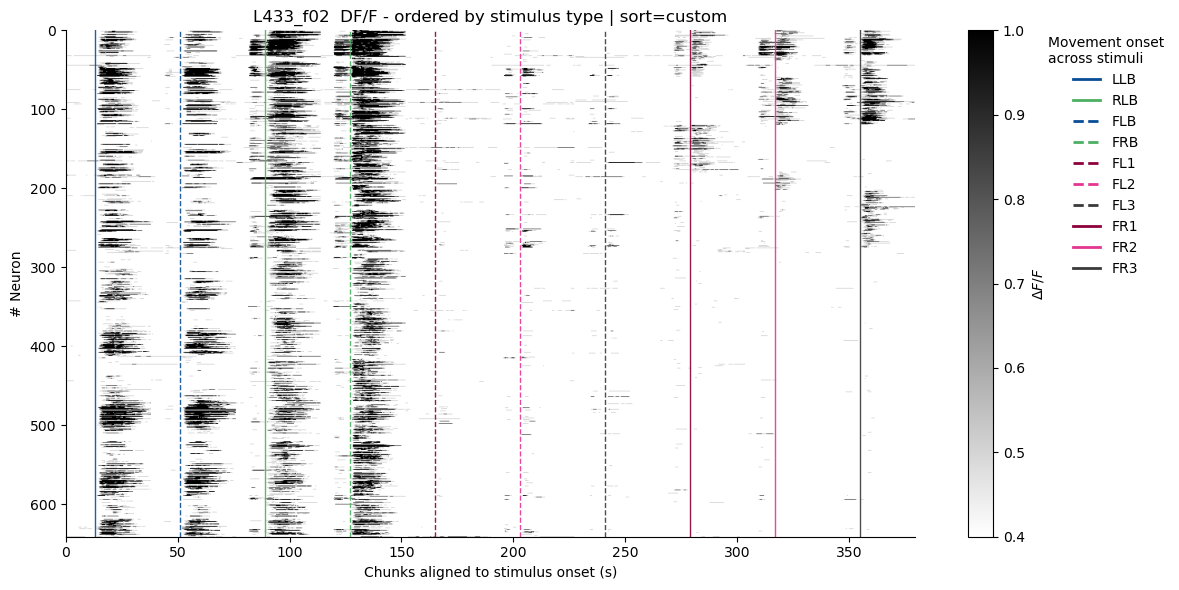

In [12]:

fig, ax, order = plott.plot_sorted_chunks_single_mode(
    dfof=raster,
    exp_log=exp_log,
    stimuli_durations=stimuli_durations,
    stimuli_colors=stimuli_colors,
    stimuli_linestyles=stimuli_linestyles,
    stimuli_ordered=stimuli_ordered,
    fps_2p=fps_2p,
    window_pre=window_pre,
    window_post=window_post,
    sort_mode="corravg",        # or 'pca', 'hier', 'corravg', max_intensity, kmeans, none(unsorted) ...
    n_clusters=3,
    random_state=42,
    average_across_repeats=True, # 👈 False to keep all repeats True to average across repeats
    fish_id=fish_id,
    neuron_order=neuron_order,       # 👈 custom order (optional)
    sort_label=None,         # 👈 label to show in the title
)
plt.show()

Stim 10: 465 evoked, 10 tardive, 166 non-responsive


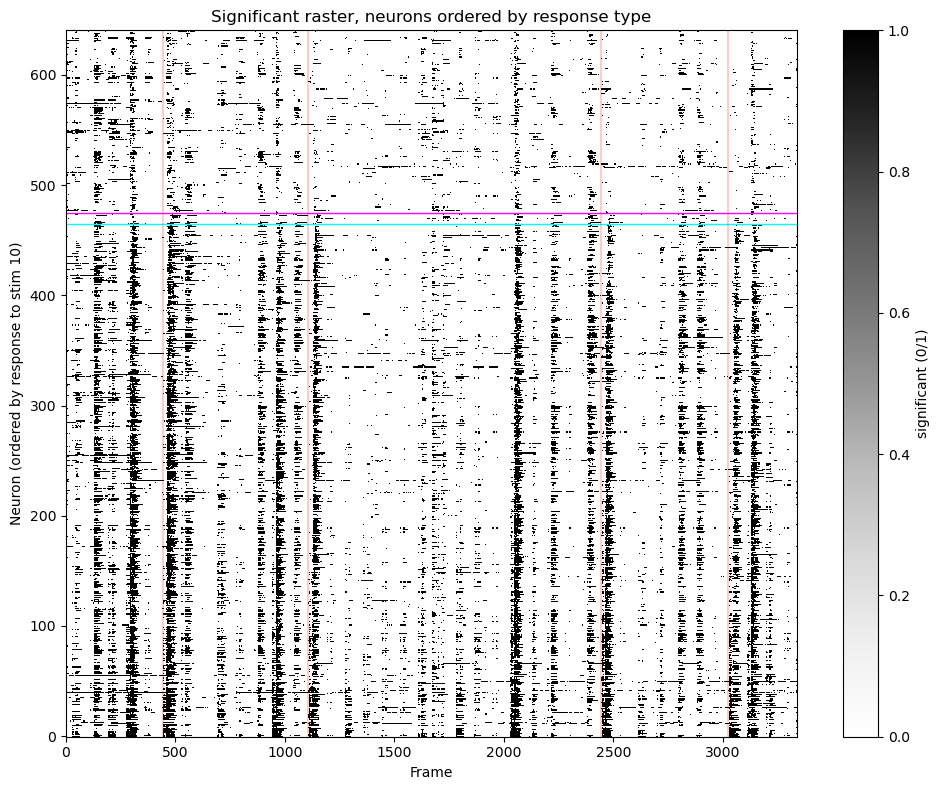

In [13]:

# --- choose which stimulus to use for ordering ---
stim_id_to_use = 10  # or 2

resp_type = response_type_by_id[stim_id_to_use]   # (n_neurons,) with 0/1/2
onset_sec = onset_sec_by_id[stim_id_to_use]       # (n_neurons,) in seconds (nan if 0)

# --- split by response type ---
idx_evoked  = np.where(resp_type == 1)[0]
idx_tardive = np.where(resp_type == 2)[0]
idx_none    = np.where(resp_type == 0)[0]

print(f"Stim {stim_id_to_use}: {len(idx_evoked)} evoked, "
      f"{len(idx_tardive)} tardive, {len(idx_none)} non-responsive")

# --- sort evoked & tardive by onset time (earlier first) ---
if len(idx_evoked) > 0:
    evoked_order = idx_evoked[np.argsort(onset_sec[idx_evoked])]
else:
    evoked_order = np.array([], dtype=int)

if len(idx_tardive) > 0:
    tardive_order = idx_tardive[np.argsort(onset_sec[idx_tardive])]
else:
    tardive_order = np.array([], dtype=int)

# non-responsive: keep original order
none_order = idx_none

# --- final neuron order: evoked -> tardive -> none ---
neuron_order = np.concatenate([evoked_order, tardive_order, none_order])

# --- plot the raster with this neuron order ---
plt.figure(figsize=(10, 8))

# raster is (frames, neurons); want (neurons, frames) so transpose
plt.imshow(
    raster[:, neuron_order].T,
    aspect='auto',
    interpolation='nearest',
    origin='lower',
    cmap='Greys',
)

plt.xlabel("Frame")
plt.ylabel("Neuron (ordered by response to stim {})".format(stim_id_to_use))
plt.title("Significant raster, neurons ordered by response type")

# draw group boundaries
n_evoked  = len(evoked_order)
n_tardive = len(tardive_order)

if n_evoked > 0:
    plt.axhline(n_evoked - 0.5, color='cyan', linewidth=1, label='evoked/tardive boundary')
if n_tardive > 0:
    plt.axhline(n_evoked + n_tardive - 0.5, color='magenta', linewidth=1, label='tardive/none boundary')

# mark stimulus onsets for this stimulus id
trial_onsets = onsets_by_id[stim_id_to_use]  # array of global onset frames
for t in trial_onsets:
    plt.axvline(t, color='red', alpha=0.2)

plt.colorbar(label="significant (0/1)")
plt.tight_layout()
plt.show()

